<a href="https://colab.research.google.com/github/sabre-code/flower_classification/blob/main/flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import glob
import cv2
from skimage.transform import resize

In [7]:
folders = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
x = [] # feature data set (images)
y = [] # Target data set (label)

**Code to check GPU**

In [25]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-6f8840a6-79b7-c912-412c-054cd0f88a71)


In [9]:
for folder in folders:
  path = '/content/drive/My Drive/GitHub/flower_classification/flowers_cleaned/'+folder+'/*.jpg'
  files = glob.glob(path)

  for myFile in files:
    image = cv2.imread(myFile)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = resize(image,(32,32,3))
    x.append(image)
    y.append(folder)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

'dandelion'

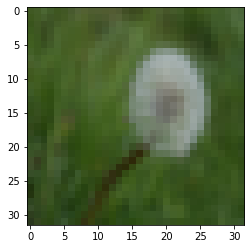

In [11]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[456])
y_train[456]

In [12]:
#Convert all the labels to numeric values
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [13]:
#Convert the labels into a set of 5 numbers to input into the neural network

from tensorflow.keras.utils import to_categorical

y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

In [14]:
y_train_one

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [15]:
#Print the new label for first image
print('New label is :',y_train_one[1])

New label is : [0. 1. 0. 0. 0.]


In [16]:
#Normalizing the pixels in the image to be values between 0 and 1.

In [17]:
import numpy as np
x_train = np.array(x_train) /255
x_test = np.array(x_test) / 255

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers
model = tf.keras.Sequential()

In [52]:
model.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(4, 4)))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5,  activation='softmax'))

In [53]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
hist = model.fit(x_train, y_train_one, batch_size = 50, epochs = 125, validation_split = 0.2)

Epoch 1/125
49/49 [==============================] - 1s 13ms/step - loss: 1.5897 - accuracy: 0.2757 - val_loss: 1.5915 - val_accuracy: 0.2897
Epoch 2/125
49/49 [==============================] - 0s 5ms/step - loss: 1.5816 - accuracy: 0.2752 - val_loss: 1.5895 - val_accuracy: 0.2897
Epoch 3/125
49/49 [==============================] - 0s 5ms/step - loss: 1.5804 - accuracy: 0.2752 - val_loss: 1.5875 - val_accuracy: 0.2897
Epoch 4/125
49/49 [==============================] - 0s 6ms/step - loss: 1.5791 - accuracy: 0.2752 - val_loss: 1.5863 - val_accuracy: 0.2897
Epoch 5/125
49/49 [==============================] - 0s 5ms/step - loss: 1.5770 - accuracy: 0.2752 - val_loss: 1.5854 - val_accuracy: 0.2897
Epoch 6/125
49/49 [==============================] - 0s 6ms/step - loss: 1.5722 - accuracy: 0.2752 - val_loss: 1.5748 - val_accuracy: 0.2897
Epoch 7/125
49/49 [==============================] - 0s 6ms/step - loss: 1.5499 - accuracy: 0.2761 - val_loss: 1.5457 - val_accuracy: 0.3460
Epoch 8/125


In [55]:
model.evaluate(x_test,y_test_one)

24/24 [==============================] - 0s 4ms/step - loss: 1.0507 - accuracy: 0.5960


[1.0506848096847534, 0.5960264801979065]

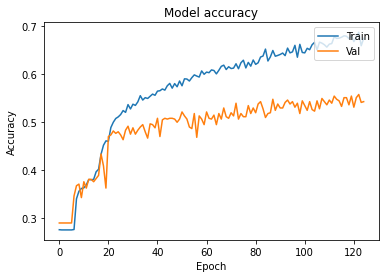

In [56]:
#visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

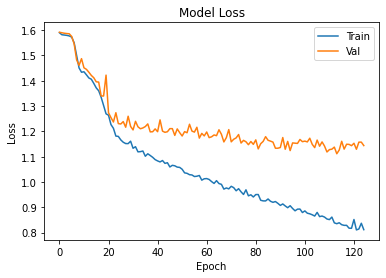

In [57]:
#Visualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()